In [ ]:
import pandas as pd
df=pd.read_excel('/content/final_amazon (1).xlsx')
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,3158,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,5024,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Satisfied,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B07JW9H4J1,1187,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,8179,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Charging is really fast,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
2,B07JW9H4J1,1759,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,7966,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Value for money,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
3,B07JW9H4J1,523,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,6162,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Product review,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
4,B07JW9H4J1,21,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,8785,"Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",Good quality,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,B01M6453MB,3123,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year",7862,"Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...",everything was good couldn't return bcoz I nee...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...
4624,B009P2LIL4,3288,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,1212,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",very good,"plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
4625,B009P2LIL4,851,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,6428,"Nehal Desai,Danish Parwez,Amazon Customer,Amaz...","R1TLRJVW4STY5I,R2O455KRN493R1,R3Q5MVGBRIAS2G,R...",Work but front melt after 2 month,"plastic but cool body ,u have to find sturdy s...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Bajaj-RX-10-2000-Watt-Co...
4626,B00J5DYCCA,2495,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","1,399","1,890",26%,4,"8,031",Fan sweep area: 230 MM ; Noise level: (40 - 45...,8571,"Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...","R39Q2Y79MM9SWK,R3079BG1NIH6MB,R29A31ZELTZNJM,R...",Fan Speed is slow,I have installed this in my kitchen wor

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np


df2=pd.DataFrame()
# Tokenizing the 'review_title' column
df2['tokenized_review_title'] = df['review_title'].apply(lambda x: word_tokenize(str(x).lower()) if pd.notnull(x) else [])

# Displaying the DataFrame with tokenized review titles
df2


,tokenized_review_title
0,[satisfied]
1,"[charging, is, really, fast]"
2,"[value, for, money]"
3,"[product, review]"
4,"[good, quality]"
...,...
4623,"[everything, was, good, could, n't, return, bc..."
4624,"[very, good]"
4625,"[work, but, front, melt, after, 2, month]"
4626,"[fan, speed, is, slow]"


In [ ]:
from collections import Counter

# Flatten the list of tokenized words across all rows
all_tokens = [token for sublist in df2['tokenized_review_title'] for token in sublist]

# Count the frequency of each word
word_frequency = Counter(all_tokens)

# Display the top 10 most common words
top_words = word_frequency.most_common(10)
print("Top 10 most common words:")
print(top_words)


Top 10 most common words:
[('good', 1495), ('product', 946), ('for', 618), ('.', 509), ('it', 353), ('the', 344), ('is', 342), ('and', 325), ('nice', 311), ('quality', 255)]


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not downloaded already
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Your DataFrame with tokenized_review_title column

# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stopword removal to the tokenized_review_title column
df2['without_stopwords'] = df2['tokenized_review_title'].apply(remove_stopwords)

# Display the DataFrame with tokenized review titles without stopwords
print(df2['without_stopwords'])


[nltk_data] Downloading package stopwords to /root/nltk_data...


0                                             [satisfied]
1                                [charging, really, fast]
2                                          [value, money]
3                                       [product, review]
4                                         [good, quality]
                              ...                        
4623    [everything, good, could, n't, return, bcoz, n...
4624                                               [good]
4625                        [work, front, melt, 2, month]
4626                                   [fan, speed, slow]
4627                                     [works, perfect]
Name: without_stopwords, Length: 4628, dtype: object


[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sample tokenized words


# Initializing WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a list of words
def perform_lemmatization(tokens):
    if isinstance(tokens, list):
        return [lemmatizer.lemmatize(word) for word in tokens]
    else:
        return lemmatizer.lemmatize(tokens)

# Applying lemmatization
lemmatized_words = [perform_lemmatization(tokens) for tokens in df2['without_stopwords']]

print("Lemmatized Words:", lemmatized_words)


Lemmatized Words: [['satisfied'], ['charging', 'really', 'fast'], ['value', 'money'], ['product', 'review'], ['good', 'quality'], ['good', 'product'], ['good', 'product'], ['seems', 'good'], ['no_review'], ['no_review'], ['no_review'], ['no_review'], ['good', 'braided', 'cable', 'type', 'c', 'device'], ['good', 'quality', 'product', 'ambrane'], ['super', 'cable'], [], ['good', 'quality'], ['good', 'product'], ['good'], ['good', 'speed', 'earlier', 'version'], ['good', 'product'], ['working', 'good'], ['good', 'price'], ['good'], ['worth', 'money'], ['working', 'nice'], ["'s", 'really', 'nice', 'product'], ['no_review'], ['no_review'], ['no_review'], ['good', 'product'], ['good', 'one'], ['nice'], ['really', 'nice', 'product'], ['good', 'original'], ['decent'], ["'s", 'pretty', 'good'], ['average', 'quality'], ['good', 'useful', 'usb', 'cable'], ['good', 'usb', 'cable', '.', 'experience', 'good', 'long', 'lasting'], ['long', 'durable', '.'], ['good'], ['worth', 'money', '-', 'suitable',

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Assuming 'lemmatized_review_titles' is your lemmatized column after preprocessing
# Calculate sentiment scores for each review title
def analyze_sentiment(review):
    sentiment_score = sid.polarity_scores(review)
    return sentiment_score

# Applying sentiment analysis to your reviews
df2['sentiment_score'] = df2['without_stopwords'].apply(lambda x: analyze_sentiment(' '.join(x)))

# Extracting sentiment labels (positive, negative, neutral) based on the scores
def extract_sentiment_label(score):
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Applying sentiment labels to the scores
df2['sentiment_label'] = df2['sentiment_score'].apply(extract_sentiment_label)

# Displaying the DataFrame with sentiment labels
print(df2[['without_stopwords', 'sentiment_label']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                      without_stopwords sentiment_label
0                                           [satisfied]        Positive
1                              [charging, really, fast]         Neutral
2                                        [value, money]        Positive
3                                     [product, review]         Neutral
4                                       [good, quality]        Positive
...                                                 ...             ...
4623  [everything, good, could, n't, return, bcoz, n...        Positive
4624                                             [good]        Positive
4625                      [work, front, melt, 2, month]         Neutral
4626                                 [fan, speed, slow]        Positive
4627                                   [works, perfect]        Positive

[4628 rows x 2 columns]


In [ ]:
df2.sample(50)

,tokenized_review_title,without_stopwords,sentiment_score,sentiment_label
4352,"[with, safety, locks, .]","[safety, locks, .]","{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",Positive
4018,"[no, noise, and, all, clean, air, ., very, eff...","[noise, clean, air, ., effective, family, noti...","{'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...",Positive
2466,"[fulfil, purpose]","[fulfil, purpose]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
670,"[good, quality, cable]","[good, quality, cable]","{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",Positive
2668,[good],[good],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive
3092,"[value, for, money]","[value, money]","{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",Positive
206,[assembly],[assembly],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3815,"[a, very, good, product.worth, buying]","[good, product.worth, buying]","{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",Positive
4333,"[small, but, useful, !]","[small, useful, !]","{'neg': 0.0, 'neu': 0.239, 'pos': 0.761, 'comp...",Positive
2359,"[ok, ok]","[ok, ok]","{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive


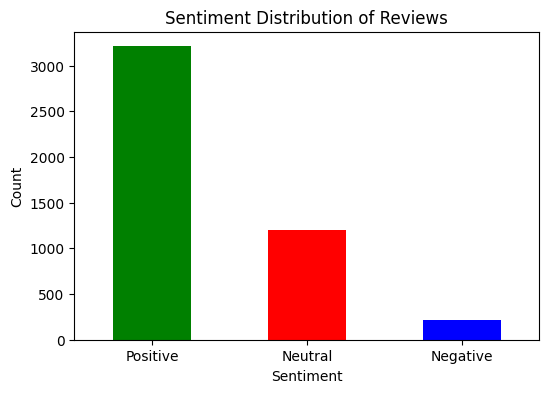

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'sentiment_label' contains the sentiment labels for each review
sentiment_counts = df2['sentiment_label'].value_counts()

# Plotting sentiment distribution
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
df3=df2.copy()
df3

,tokenized_review_title,without_stopwords,sentiment_score,sentiment_label
0,[satisfied],[satisfied],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive
1,"[charging, is, really, fast]","[charging, really, fast]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,"[value, for, money]","[value, money]","{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",Positive
3,"[product, review]","[product, review]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,"[good, quality]","[good, quality]","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",Positive
...,...,...,...,...
4623,"[everything, was, good, could, n't, return, bc...","[everything, good, could, n't, return, bcoz, n...","{'neg': 0.226, 'neu': 0.522, 'pos': 0.252, 'co...",Positive
4624,"[very, good]",[good],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive
4625,"[work, but, front, melt, after, 2, month]","[work, front, melt, 2, month]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4626,"[fan, speed, is, slow]","[fan, speed, slow]","{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",Positive


In [ ]:
df2['sentiment_label'].value_counts()

Positive    3210
Neutral     1205
Negative     213
Name: sentiment_label, dtype: int64

In [ ]:
from collections import Counter

# Separate reviews by sentiment
positive_reviews = df2[df2['sentiment_label'] == 'Positive']['without_stopwords']
negative_reviews = df2[df2['sentiment_label'] == 'Negative']['without_stopwords']
neutral_reviews = df2[df2['sentiment_label'] == 'Neutral']['without_stopwords']

# Function to calculate word frequency for a given sentiment category
def calculate_word_frequency(reviews):
    all_words = [word for sublist in reviews for word in sublist]
    word_frequency = Counter(all_words)
    return word_frequency

# Calculate word frequency for each sentiment
positive_word_freq = calculate_word_frequency(positive_reviews)
negative_word_freq = calculate_word_frequency(negative_reviews)
neutral_word_freq = calculate_word_frequency(neutral_reviews)

# Display the top 10 most common words for each sentiment
print("Top 10 most common words in Positive reviews:", positive_word_freq.most_common(10))
print("Top 10 most common words in Negative reviews:", negative_word_freq.most_common(10))
print("Top 10 most common words in Neutral reviews:", neutral_word_freq.most_common(10))


Top 10 most common words in Positive reviews: [('good', 1477), ('product', 810), ('.', 358), ('nice', 309), ('money', 217), ('quality', 191), ('value', 185), ('best', 178), ('price', 152), ('worth', 141)]
Top 10 most common words in Negative reviews: [('.', 40), ('product', 34), ('bad', 32), ('quality', 18), ('worst', 17), ('phone', 16), ('poor', 15), ('good', 14), ('problem', 13), ("n't", 10)]
Top 10 most common words in Neutral reviews: [('no_review', 112), ('.', 111), ('product', 102), ('!', 47), ('quality', 46), ('decent', 44), ('average', 36), ('buy', 36), ('charging', 31), ('works', 31)]


In [ ]:
df2['review_title']=df['review_title']
df2

,tokenized_review_title,without_stopwords,sentiment_score,sentiment_label,review_title
0,[satisfied],[satisfied],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive,Satisfied
1,"[charging, is, really, fast]","[charging, really, fast]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Charging is really fast
2,"[value, for, money]","[value, money]","{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'comp...",Positive,Value for money
3,"[product, review]","[product, review]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Product review
4,"[good, quality]","[good, quality]","{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",Positive,Good quality
...,...,...,...,...,...
4623,"[everything, was, good, could, n't, return, bc...","[everything, good, could, n't, return, bcoz, n...","{'neg': 0.226, 'neu': 0.522, 'pos': 0.252, 'co...",Positive,everything was good couldn't return bcoz I nee...
4624,"[very, good]",[good],"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",Positive,very good
4625,"[work, but, front, melt, after, 2, month]","[work, front, melt, 2, month]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,Work but front melt after 2 month
4626,"[fan, speed, is, slow]","[fan, speed, slow]","{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'comp...",Positive,Fan Speed is slow


In [ ]:
df2.drop(['tokenized_review_title','without_stopwords','sentiment_score'],axis=1,inplace=True)

In [ ]:
df2

,sentiment_label,review_title
0,Positive,Satisfied
1,Neutral,Charging is really fast
2,Positive,Value for money
3,Neutral,Product review
4,Positive,Good quality
...,...,...
4623,Positive,everything was good couldn't return bcoz I nee...
4624,Positive,very good
4625,Neutral,Work but front melt after 2 month
4626,Positive,Fan Speed is slow


In [ ]:
df4=pd.merge(df,df2,on=['review_title'])

In [ ]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           4628 non-null   object
 1   product_name         4628 non-null   int64 
 2   category             4628 non-null   object
 3   discounted_price     4628 non-null   object
 4   actual_price         4628 non-null   object
 5   discount_percentage  4628 non-null   object
 6   rating               4628 non-null   object
 7   rating_count         4623 non-null   object
 8   user_id              4628 non-null   object
 9   review_title         4627 non-null   object
 10  class                4628 non-null   object
dtypes: int64(1), object(10)
memory usage: 397.8+ KB
